# Collecting Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import math

titanic_data = pd.read_csv('train.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Analyzing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

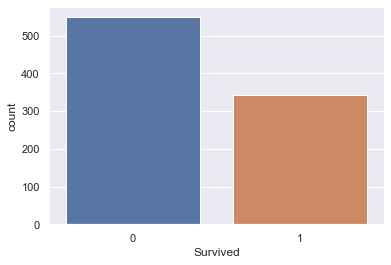

In [3]:
# This is an interesting thing brother
sns.set_theme(style="darkgrid")
sns.countplot(x = "Survived", data = titanic_data)

"\n\nYou will surely have trouble understanding the graph below.\n\nFirst of all : \n\n0-> Not Survived\n1-> Survived\n\nSecond of all :\n\nWe have taken the 'x' axis as Survived and colored bars as representation of men and women \nwho didn't survive(against 0 mark) or survived(against 1 mark)\n\nRESULT:\nWe can see that against 0 mark, there are far more men as compared to women, but\nagainst 1 mark, there are more women than men, which means that women were given preference over men\n\n"

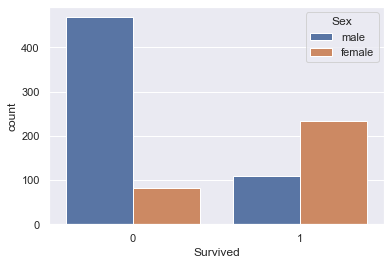

In [4]:
sns.countplot(x = "Survived", hue = "Sex", data = titanic_data) # Males didn't survive much

'''

You will surely have trouble understanding the graph below.

First of all : 

0-> Not Survived
1-> Survived

Second of all :

We have taken the 'x' axis as Survived and colored bars as representation of men and women 
who didn't survive(against 0 mark) or survived(against 1 mark)

RESULT:
We can see that against 0 mark, there are far more men as compared to women, but
against 1 mark, there are more women than men, which means that women were given preference over men

'''

' This data shows that people of 3rd class comprised majority of the dead '

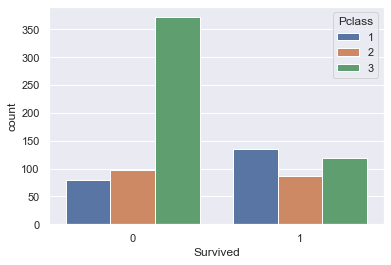

In [5]:
sns.countplot(x = "Survived", hue = "Pclass", data = titanic_data)
''' This data shows that people of 3rd class comprised majority of the dead '''

<AxesSubplot:xlabel='Survived', ylabel='count'>

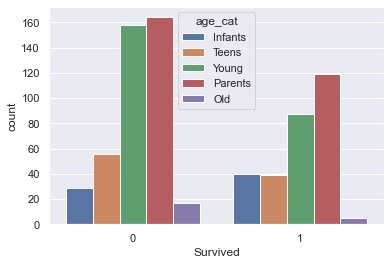

In [6]:
'''Creating another categorical column for Age column'''
titanic_data["age_cat"] = pd.cut(titanic_data["Age"], bins = [0, 12, 19, 30, 60, 100], labels = ["Infants", "Teens", "Young", "Parents", "Old"])

sns.countplot(x = "Survived", hue = "age_cat", data = titanic_data)

<AxesSubplot:xlabel='count', ylabel='Survived'>

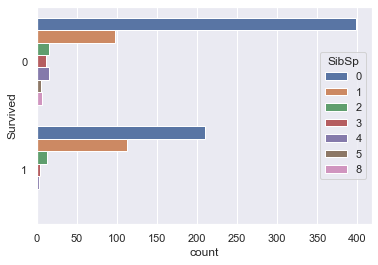

In [7]:
sns.countplot(y = "Survived", hue = "SibSp", data = titanic_data) # just chnaged x to y to get horizontal representation

# Data Wrangling

Here, we will try to clean the data by either filling the NAN values or by deleting the rows containing NAN values or by deleting the column itself

In [8]:
titanic_data.drop(["Cabin"], axis = 1, inplace = True)

In [9]:
titanic_data.shape

(891, 12)

In [10]:
median = titanic_data["Age"].median()
titanic_data["Age"].fillna(median, inplace = True)
# titanic_data.dropna(inplace = True) # we are removing every row which has even one Nan value
titanic_data.shape

(891, 12)

In [11]:
titanic_data.drop(["age_cat", "PassengerId", "Name", "Ticket"],axis = 1, inplace = True)

In [12]:
titanic_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


# Creating categorical columns for columns which don't have int datatype

In [13]:
sex = pd.get_dummies(titanic_data["Sex"], drop_first = True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [14]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
cls = pd.get_dummies(titanic_data["Pclass"], drop_first = "True")
cls

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [16]:
embark = pd.get_dummies(titanic_data["Embarked"], drop_first = True)

In [17]:
titanic_data = pd.concat([titanic_data, sex, cls, embark], axis = 1)
titanic_data.drop(["Sex", "Embarked", "Pclass"], axis = 1, inplace = True)

In [18]:
titanic_data.head(2)

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


# Training and Testing

In [19]:
# Now we want to train our model
X = titanic_data.drop("Survived", axis = 1)
y = titanic_data["Survived"]

In [20]:
from sklearn.model_selection import train_test_split, cross_val_predict

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clf1, clf2 = LogisticRegression(max_iter = 1000), KNeighborsClassifier()
clf2.fit(x_train, y_train)
clf1.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)

from sklearn.metrics import classification_report

print(f"LOGISTIC REGRESSOR : \n\n{classification_report(y_test, y_pred1)}\n\n\n" + f"K-NEIGHBORS CLASSIFIER : \n\n{classification_report(y_test, y_pred2)}" )

LOGISTIC REGRESSOR : 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



K-NEIGHBORS CLASSIFIER : 

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       157
           1       0.67      0.52      0.59       111

    accuracy                           0.69       268
   macro avg       0.69      0.67      0.67       268
weighted avg       0.69      0.69      0.69       268



#### It is clear from the above reports that Logistic Regression is performing better than that of K Neighbors Classfier